Представлен датасет центра приюта животных, и вашей задачей будет обучить модель 
таким образом, чтобы  по определенным признакам была возможность максимально уверенно
предсказать метки 'Adoption' и 'Transfer' (столбец “outcome_type”).

Здесь вы вольны делать что угодно. 
Я хочу видеть от вас:

1. Проверка наличия/обработка пропусков

2. Проверьте взаимосвязи между признаками

3. Попробуйте создать свои признаки

4. Удалите лишние

5. Обратите внимание на текстовые столбцы. Подумайте, что можно извлечь полезного оттуда

6. Использование профайлера вам поможет.

7. Не забывайте, что у вас есть PCA (Метод главных компонент). 
Он может пригодиться. 

Вспомните о всем, что я говорил на предыдущих занятиях. 
Не все будет пригодится, но в жизни вам никто не будет говорить, что использовать :)

Хорошим классификатором для этой задачи будет "Случайный лес" 
(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Понимать суть работы "леса" не обязательно на данном этапе, но качество предсказаний будет выше, чем с линейным классификатором. 
(если желаете, вот гайд https://adataanalyst.com/scikit-learn/linear-classification-method/)

In [9]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('aac_shelter_outcomes.csv')

data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  78248 non-null  object
 1   animal_id         78256 non-null  object
 2   animal_type       78256 non-null  object
 3   breed             78256 non-null  object
 4   color             78256 non-null  object
 5   date_of_birth     78256 non-null  object
 6   datetime          78256 non-null  object
 7   monthyear         78256 non-null  object
 8   name              54370 non-null  object
 9   outcome_subtype   35963 non-null  object
 10  outcome_type      78244 non-null  object
 11  sex_upon_outcome  78254 non-null  object
dtypes: object(12)
memory usage: 7.2+ MB


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
78251,1 month,A764894,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04T00:00:00,2018-02-01T18:26:00,2018-02-01T18:26:00,NaN,Foster,Adoption,Spayed Female
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30T00:00:00,2018-02-01T18:06:00,2018-02-01T18:06:00,Max,NaN,Adoption,Neutered Male
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01T00:00:00,2018-02-01T18:08:00,2018-02-01T18:08:00,NaN,Rabies Risk,Euthanasia,Unknown
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13T00:00:00,2018-02-01T18:32:00,2018-02-01T18:32:00,NaN,NaN,Adoption,Spayed Female


In [3]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'])
data['days_upon_outcome'] = (data['datetime'] - data['date_of_birth']).dt.days
data['has_name'] = data.apply(lambda row: 0 if pd.isna(row['name']) else 1, axis=1)
data['outcome_type'] = data.apply(
    lambda row: 'Other' if row['outcome_type'] not in ['Adoption', 'Transfer'] else row['outcome_type'],
    axis=1
)

data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age_upon_outcome   78248 non-null  object        
 1   animal_id          78256 non-null  object        
 2   animal_type        78256 non-null  object        
 3   breed              78256 non-null  object        
 4   color              78256 non-null  object        
 5   date_of_birth      78256 non-null  datetime64[ns]
 6   datetime           78256 non-null  datetime64[ns]
 7   monthyear          78256 non-null  object        
 8   name               54370 non-null  object        
 9   outcome_subtype    35963 non-null  object        
 10  outcome_type       78256 non-null  object        
 11  sex_upon_outcome   78254 non-null  object        
 12  days_upon_outcome  78256 non-null  int64         
 13  has_name           78256 non-null  int64         
dtypes: dat

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,days_upon_outcome,has_name
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,15,0
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,366,1
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,429,1
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,3300,1
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Other,Unknown,181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78251,1 month,A764894,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04,2018-02-01 18:26:00,2018-02-01T18:26:00,NaN,Foster,Adoption,Spayed Female,59,0
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30,2018-02-01 18:06:00,2018-02-01T18:06:00,Max,NaN,Adoption,Neutered Male,1129,1
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01,2018-02-01 18:08:00,2018-02-01T18:08:00,NaN,Rabies Risk,Other,Unknown,365,0
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13,2018-02-01 18:32:00,2018-02-01T18:32:00,NaN,NaN,Adoption,Spayed Female,80,0


In [4]:
X = data[['animal_type', 'breed', 'color', 'has_name', 'days_upon_outcome', 'outcome_subtype', 'sex_upon_outcome']]

X

,animal_type,breed,color,has_name,days_upon_outcome,outcome_subtype,sex_upon_outcome
0,Cat,Domestic Shorthair Mix,Orange Tabby,0,15,Partner,Intact Male
1,Dog,Beagle Mix,White/Brown,1,366,Partner,Spayed Female
2,Dog,Pit Bull,Blue/White,1,429,NaN,Neutered Male
3,Dog,Miniature Schnauzer Mix,White,1,3300,Partner,Neutered Male
4,Other,Bat Mix,Brown,0,181,Rabies Risk,Unknown
...,...,...,...,...,...,...,...
78251,Dog,Golden Retriever/Labrador Retriever,Brown/White,0,59,Foster,Spayed Female
78252,Dog,Mastiff Mix,Blue/White,1,1129,NaN,Neutered Male
78253,Other,Bat Mix,Brown,0,365,Rabies Risk,Unknown
78254,Dog,Standard Schnauzer,Red,0,80,NaN,Spayed Female


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['breed'] = le.fit_transform(X['breed'])
X['color'] = le.fit_transform(X['color'])
y = le.fit_transform(data['outcome_type'])

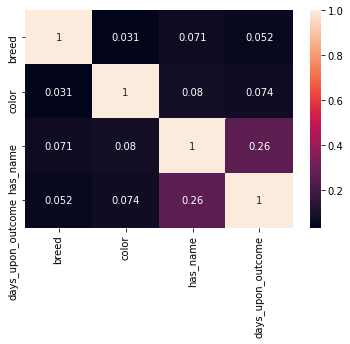

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(X.corr(), annot=True)
plt.show()

In [7]:
X = pd.get_dummies(X)

X.shape, y.shape

((78256, 33), (78256,))

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8667632150615496

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8893810963922136

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca.fit(X)

X_pca = pca.transform(X)
X_pca.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.866081696980023